In [26]:
import numpy as np 
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
low_memory=False

In [28]:
# Load the data
airlines_data = pd.read_csv("airlines.csv")
airport_data = pd.read_csv("airports.csv")
flights_data = pd.read_csv("flights.csv")

C:\Users\amanj\AppData\Local\Temp\ipykernel_14224\3386818095.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_data = pd.read_csv("flights.csv")


In [29]:
flights_data.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
flights_data.shape

(5819079, 31)

In [31]:
flights_data = flights_data.sample(frac=0.2, random_state=42)

# Verify the new shape of the DataFrame
print(flights_data.shape)

(1163816, 31)


In [32]:
airlines_data

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [33]:
airlines_data.shape

(14, 2)

In [34]:
airport_data.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [35]:
airport_data.shape

(322, 7)

In [36]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [37]:
# Filter the airport_data DataFrame for all airports
airports = airport_data.copy()

In [38]:
# Create a GeoDataFrame from the filtered airport_data DataFrame
geometry = gpd.points_from_xy(airports['LONGITUDE'], airports['LATITUDE'])
gdf = gpd.GeoDataFrame(airports, geometry=geometry)

In [39]:
# Load the United States shapefile
usa = gpd.read_file('ne_10m_admin_1_states_provinces.shp')
usa_contiguous = usa.loc[usa['admin'].isin(['United States of America'])]

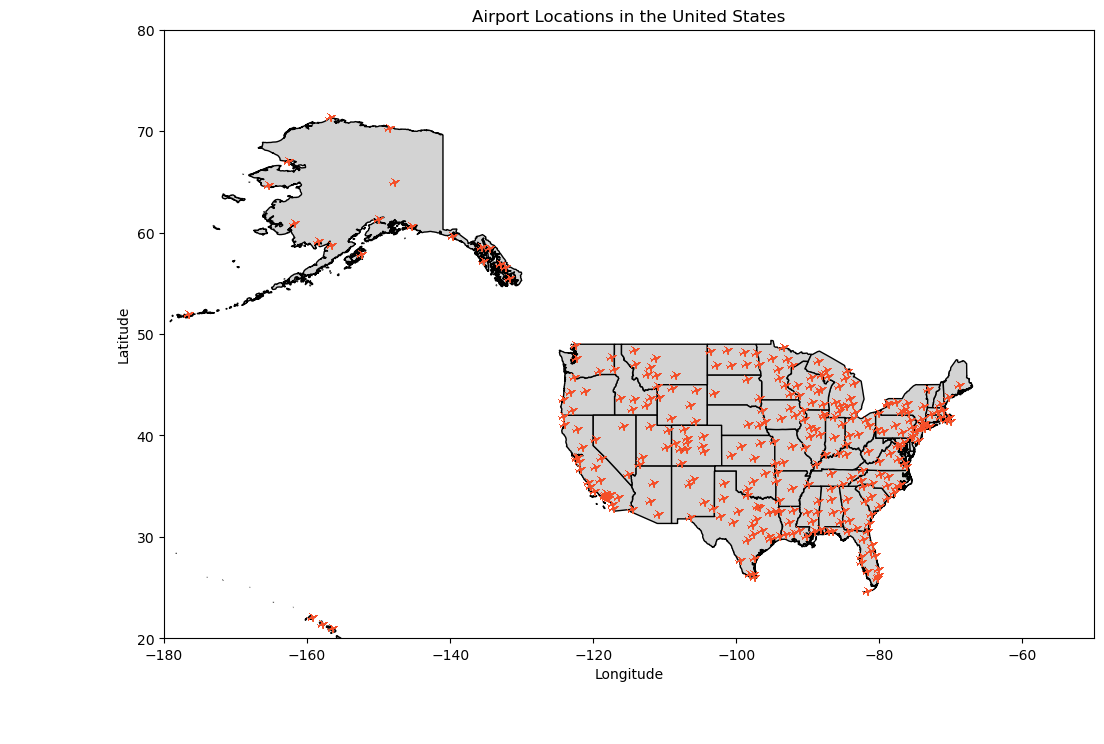

In [40]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
usa_contiguous.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the airport locations with plane icons
for idx, row in gdf.iterrows():
    imagebox = OffsetImage(plt.imread('plane_icon.png'), zoom=0.02)
    ab = AnnotationBbox(imagebox, (row['LONGITUDE'], row['LATITUDE']), frameon=False)
    ax.add_artist(ab)

# Set plot title and labels
plt.title('Airport Locations in the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set the x-axis and y-axis limits for further zooming out and focusing on the upper area
plt.xlim(-180, -50)
plt.ylim(20, 80)

# Show the plot
plt.show()


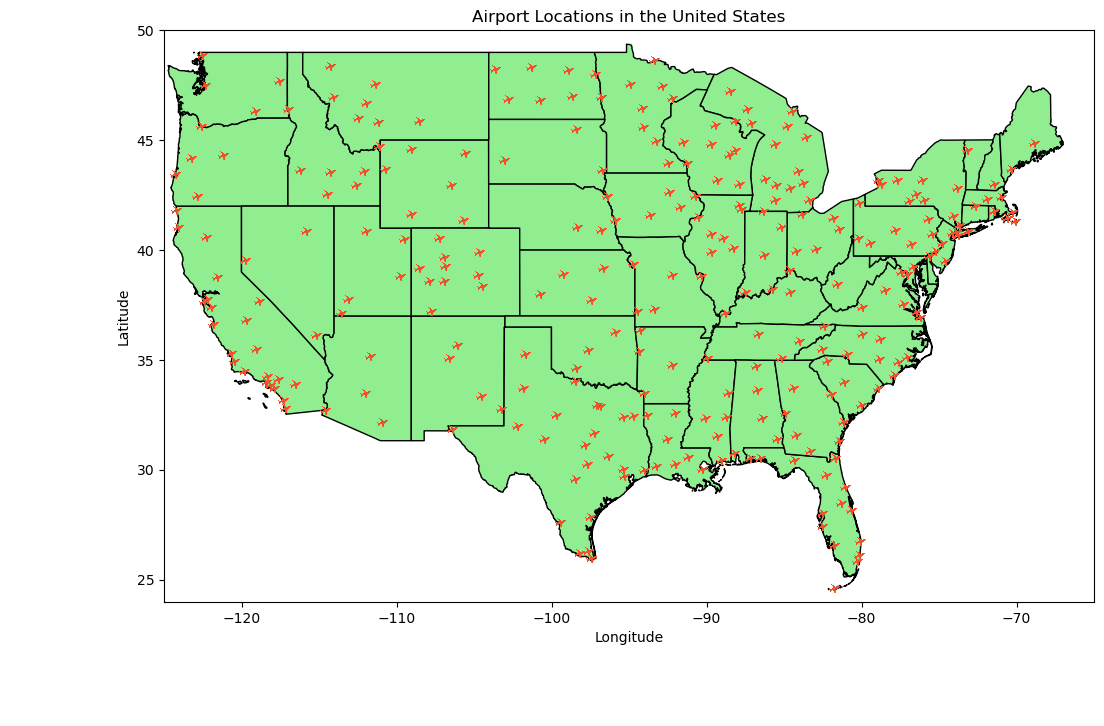

In [41]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
usa_contiguous.plot(ax=ax, color='lightgreen', edgecolor='black')

# Plot the airport locations with plane icons
for idx, row in gdf.iterrows():
    imagebox = OffsetImage(plt.imread('plane_icon.png'), zoom=0.02)
    ab = AnnotationBbox(imagebox, (row['LONGITUDE'], row['LATITUDE']), frameon=False)
    ax.add_artist(ab)

# Set plot title and labels
plt.title('Airport Locations in the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.xlim(-125, -65)
plt.ylim(24, 50)

# Show the plot
plt.show()

In [42]:
flights_data['DEPARTURE_DELAY'].max()

1670.0

In [43]:
flights_data.head(20)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1508570,2015,4,7,2,EV,4900,N759EV,FWA,DTW,1340,...,1423.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
363270,2015,1,24,6,AS,611,N413AS,LAS,SEA,1910,...,2133.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3003945,2015,7,8,3,WN,1483,N463WN,OAK,SEA,630,...,812.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2291425,2015,5,26,2,WN,193,N7745A,STL,DAL,810,...,1222.0,152.0,0,0,NaN,0.0,0.0,0.0,152.0,0.0
2973084,2015,7,6,1,UA,253,N213UA,IAH,HNL,1000,...,1316.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4130942,2015,9,14,1,DL,1381,N977DL,HSV,ATL,1800,...,2005.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4110388,2015,9,13,7,UA,1459,N26210,IAH,TPA,1357,...,1658.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2744192,2015,6,22,1,AS,656,N523AS,SEA,PHX,1120,...,1359.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5558422,2015,12,15,2,AA,1,N794AA,JFK,LAX,900,...,1213.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4782251,2015,10,26,1,F9,711,N210FR,14635,11292,725,...,916.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
flights_data.shape

(1163816, 31)

In [45]:
#lets take a segment of this data for now 
flights_seg = flights_data[0:150000]
flights_seg

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1508570,2015,4,7,2,EV,4900,N759EV,FWA,DTW,1340,...,1423.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
363270,2015,1,24,6,AS,611,N413AS,LAS,SEA,1910,...,2133.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3003945,2015,7,8,3,WN,1483,N463WN,OAK,SEA,630,...,812.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2291425,2015,5,26,2,WN,193,N7745A,STL,DAL,810,...,1222.0,152.0,0,0,NaN,0.0,0.0,0.0,152.0,0.0
2973084,2015,7,6,1,UA,253,N213UA,IAH,HNL,1000,...,1316.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584997,2015,8,11,2,WN,2887,N566WN,MSY,MDW,1205,...,1411.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3196828,2015,7,19,7,WN,1451,N945WN,BWI,SDF,1400,...,1525.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4935480,2015,11,4,3,MQ,3607,N9EAMQ,LGA,BNA,2105,...,2200.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
132739,2015,1,9,5,DL,2528,N991DL,ATL,CLE,1208,...,1340.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
flights_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1508570 to 3921901
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 150000 non-null  int64  
 1   MONTH                150000 non-null  int64  
 2   DAY                  150000 non-null  int64  
 3   DAY_OF_WEEK          150000 non-null  int64  
 4   AIRLINE              150000 non-null  object 
 5   FLIGHT_NUMBER        150000 non-null  int64  
 6   TAIL_NUMBER          149624 non-null  object 
 7   ORIGIN_AIRPORT       150000 non-null  object 
 8   DESTINATION_AIRPORT  150000 non-null  object 
 9   SCHEDULED_DEPARTURE  150000 non-null  int64  
 10  DEPARTURE_TIME       147788 non-null  float64
 11  DEPARTURE_DELAY      147788 non-null  float64
 12  TAXI_OUT             147714 non-null  float64
 13  WHEELS_OFF           147714 non-null  float64
 14  SCHEDULED_TIME       150000 non-null  float64
 15  ELAPSED_TI

In [47]:
#year column is unneccesary since the data is bounded to 2015 but day and month are important
delay =[]
for row in flights_seg['ARRIVAL_DELAY']:
    if row > 60:
        delay.append(3)
    elif row > 30:
        delay.append(2)
    elif row > 15:
        delay.append(1)
    else:
        delay.append(0)  
flights_seg['delay'] = delay

C:\Users\amanj\AppData\Local\Temp\ipykernel_14224\3562551235.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_seg['delay'] = delay


In [48]:
# 0 = On time/ before time/ not more than 15 mins of delay
# 1 = more than 15 mins and less than 30 mins of delay
# 2 = more than 30 mins and less than 1 hr of delay
# 3 = more than an hour of delay
flights_seg.value_counts('delay')

delay
0    123563
1     10089
3      8268
2      8080
dtype: int64

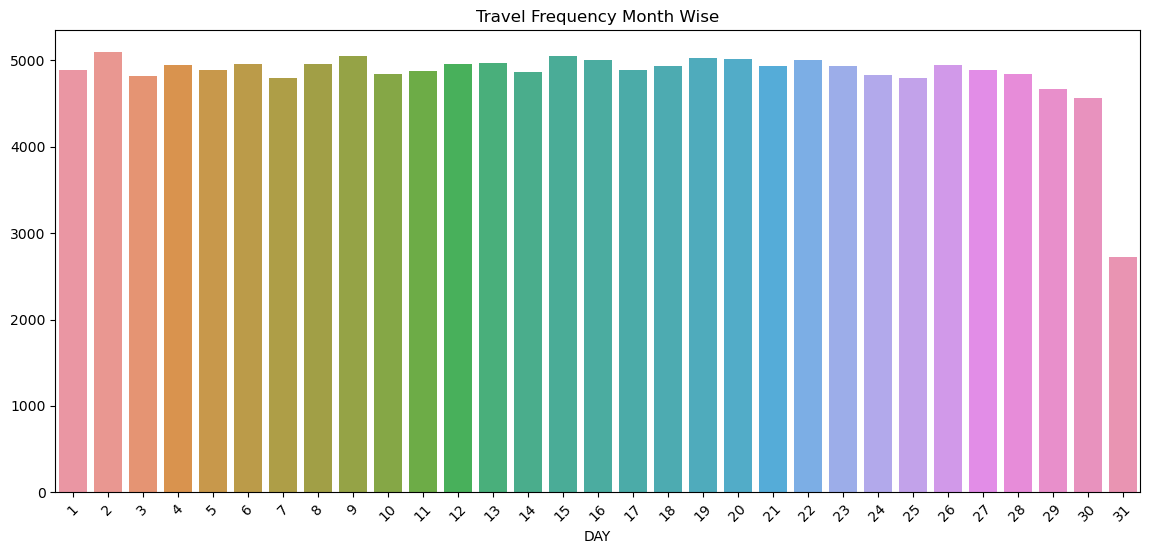

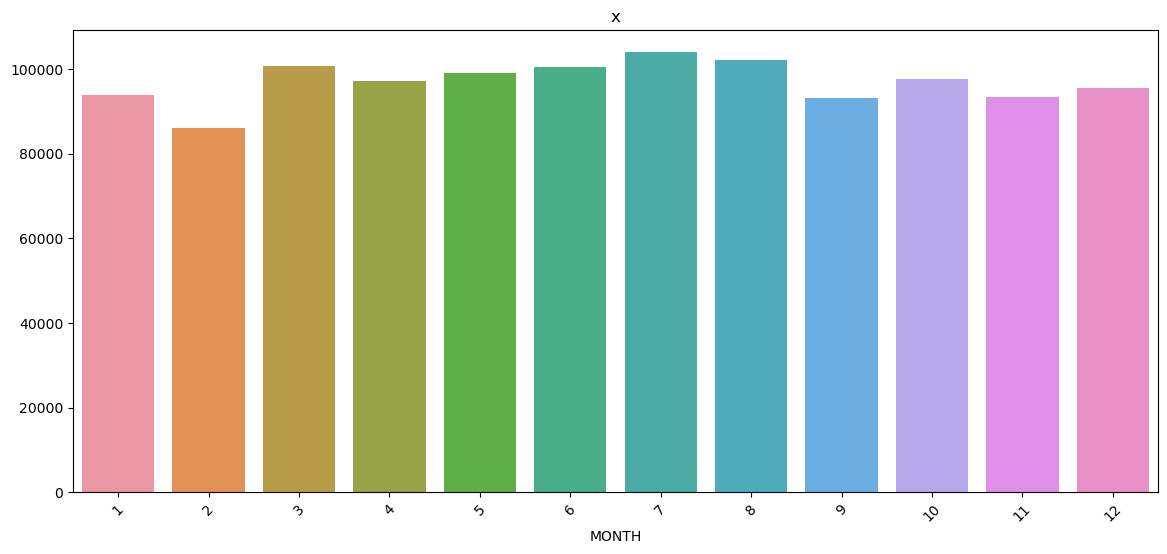

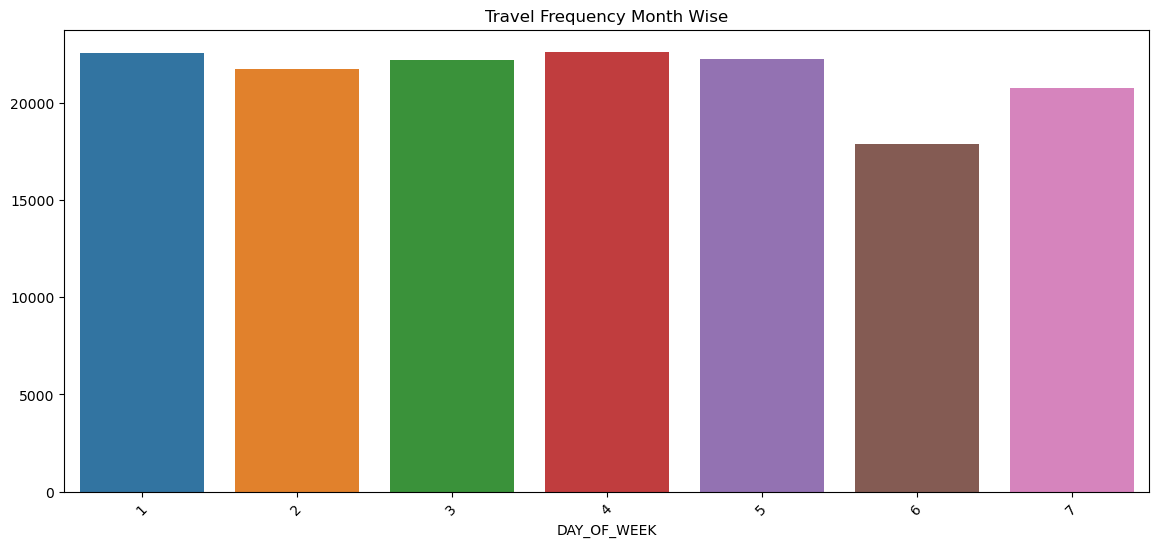

In [49]:
def plot_bar(group, title):
    plt.figure(figsize=(14,6))
    sns.barplot(x=group.index,y=group.values)     
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
plot_bar(flights_seg.value_counts('DAY'), 'Travel Frequency Month Wise')
plot_bar(flights_data.value_counts('MONTH'), 'x')
plot_bar(flights_seg.value_counts('DAY_OF_WEEK'), 'Travel Frequency Month Wise')

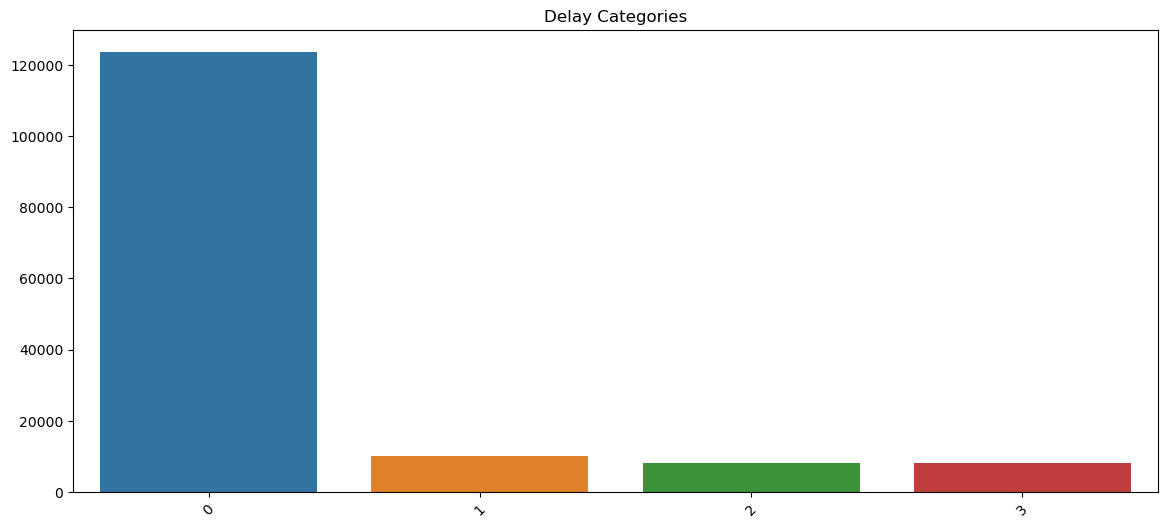

In [50]:
#Delay Categories Bar Plot
plot_bar(flights_seg['delay'].value_counts(), 'Delay Categories')

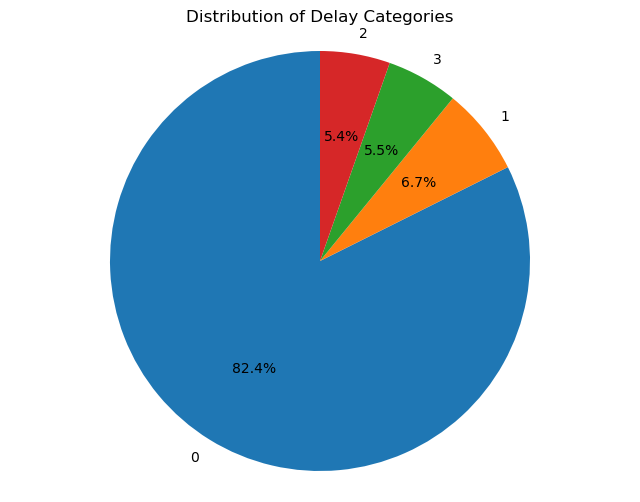

In [51]:
# Calculate the percentage of flights in each delay category
delay_counts = flights_seg['delay'].value_counts()
delay_percentages = delay_counts / delay_counts.sum() * 100

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(delay_percentages, labels=delay_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title and adjust the aspect ratio for a circular pie
plt.title('Distribution of Delay Categories')
plt.axis('equal')

# Show the pie chart
plt.show()

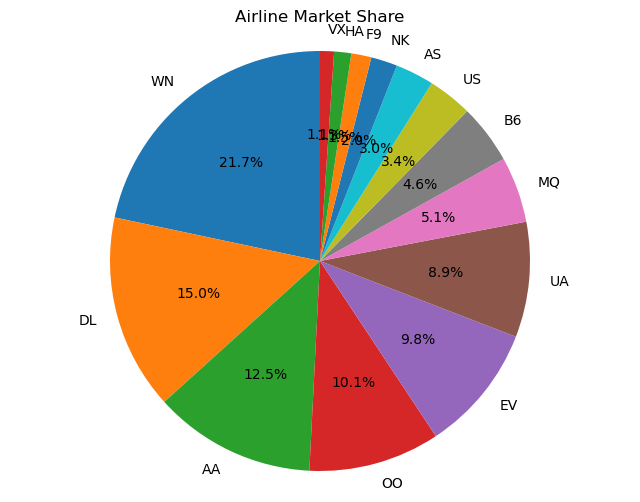

In [52]:
# Calculate the number of flights for each airline
airline_counts = flights_data['AIRLINE'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title and adjust the aspect ratio for a circular pie
plt.title('Airline Market Share')
plt.axis('equal')

# Show the pie chart
plt.show()


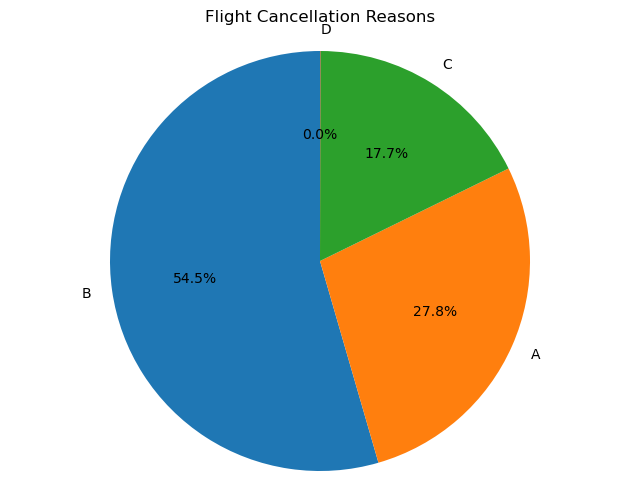

In [53]:
# Calculate the number of flights for each cancellation reason
cancellation_counts = flights_data['CANCELLATION_REASON'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cancellation_counts, labels=cancellation_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title and adjust the aspect ratio for a circular pie
plt.title('Flight Cancellation Reasons')
plt.axis('equal')

# Show the pie chart
plt.show()


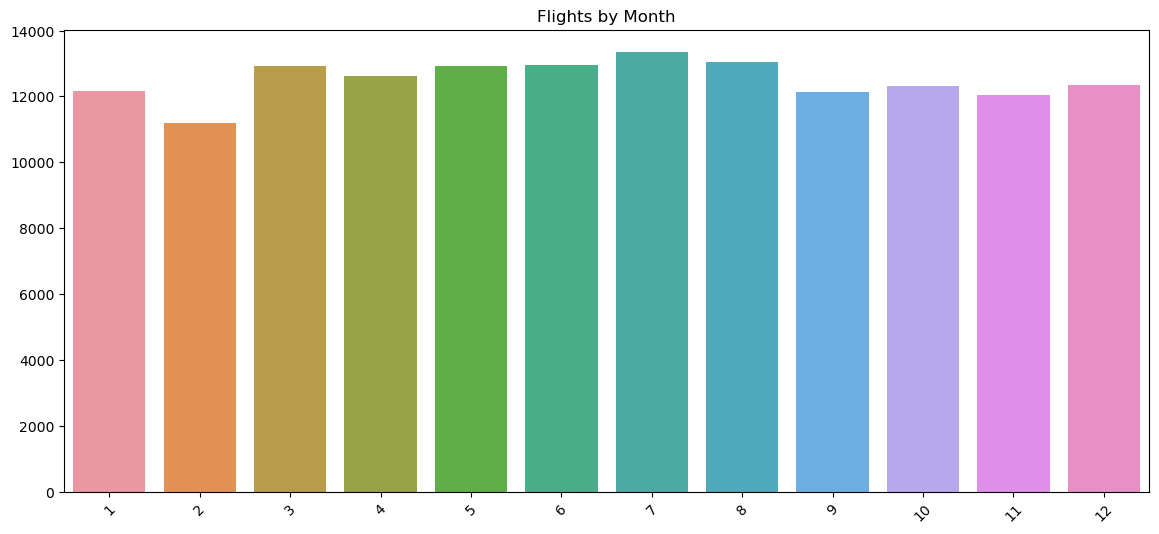

In [54]:
#Flights by Month Bar Plot
plot_bar(flights_seg['MONTH'].value_counts(), 'Flights by Month')

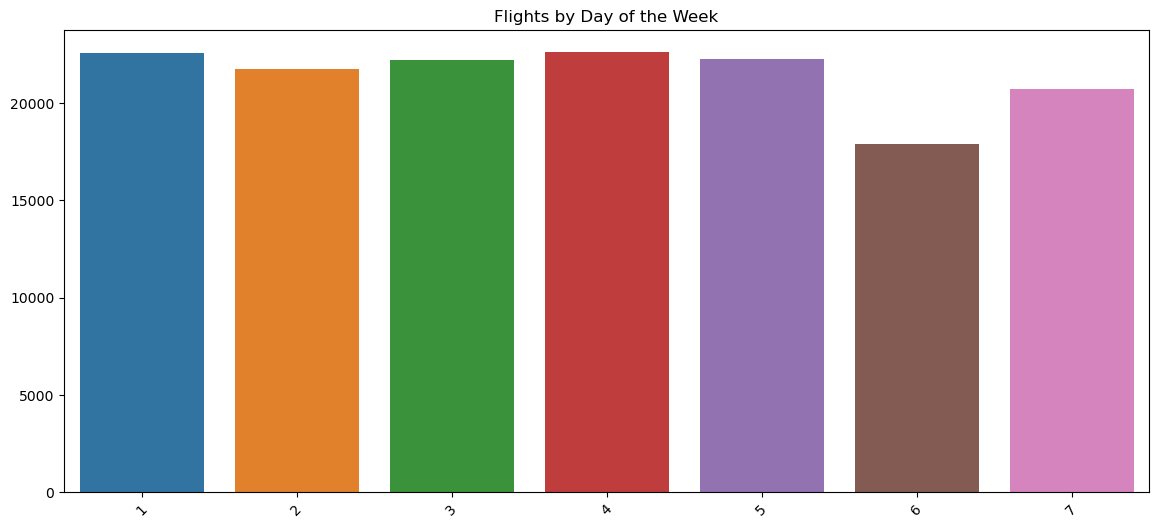

In [55]:
#Flights by Day of the Week Bar Plot
plot_bar(flights_seg['DAY_OF_WEEK'].value_counts(), 'Flights by Day of the Week')

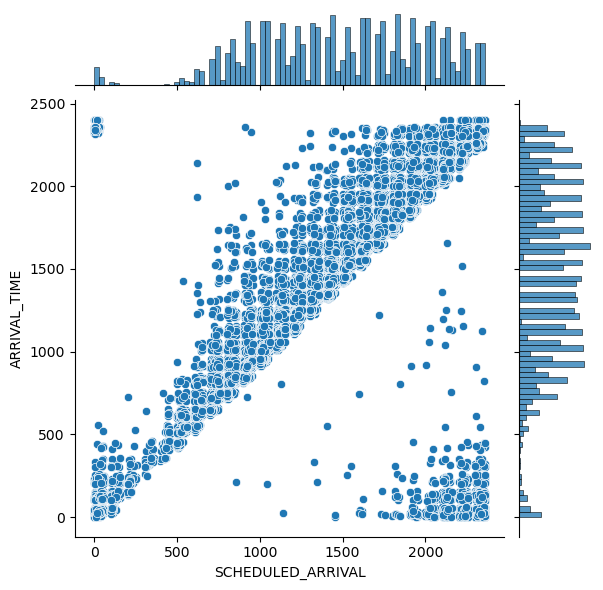

In [58]:
sns.jointplot(data=flights_seg, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

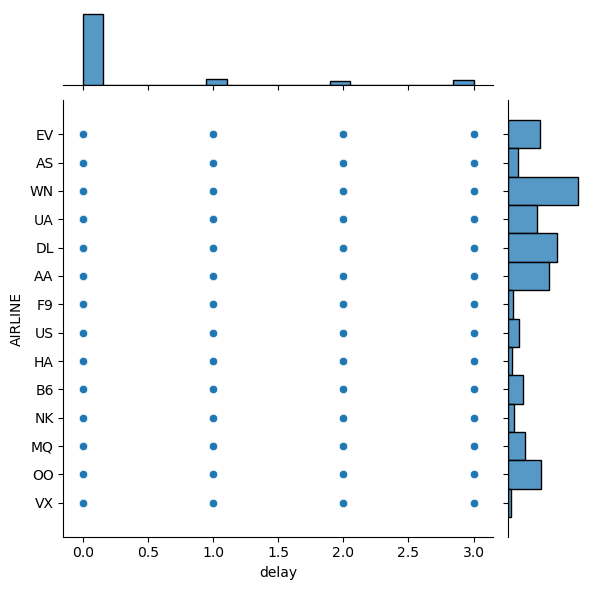

In [59]:
sns.jointplot(data=flights_seg, y="AIRLINE", x="delay")

In [60]:
Flight_data_delay =[]
for row in flights_data['ARRIVAL_DELAY']:
    if row > 60:
        Flight_data_delay.append(3)
    elif row > 30:
        Flight_data_delay.append(2)
    elif row > 15:
        Flight_data_delay.append(1)
    else:
        Flight_data_delay.append(0)  


In [61]:
flights_data['Delay'] = Flight_data_delay

In [62]:
flights_data=flights_data.drop(['YEAR','AIR_SYSTEM_DELAY','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','ARRIVAL_DELAY', "CANCELLED","LATE_AIRCRAFT_DELAY"],
                                             axis=1)

In [63]:
flights_data.describe()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,SECURITY_DELAY,AIRLINE_DELAY,WEATHER_DELAY,Delay
count,1.163816e+06,1.163816e+06,1.163816e+06,1.146672e+06,1.146672e+06,1.163816e+06,1.145353e+06,1.163816e+06,212423.000000,212423.000000,212423.000000,1.163816e+06
mean,6.523101e+00,1.570488e+01,1.329559e+03,1.335240e+03,9.389512e+00,1.494014e+03,1.476869e+03,2.600067e-03,0.076993,19.045433,2.969339,3.396422e-01
std,3.405014e+00,8.785299e+00,4.835505e+02,4.962559e+02,3.725278e+01,5.069985e+02,5.261476e+02,5.092454e-02,2.029005,49.251945,20.445256,8.135638e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.700000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,4.000000e+00,8.000000e+00,9.170000e+02,9.210000e+02,-5.000000e+00,1.110000e+03,1.059000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
50%,7.000000e+00,1.600000e+01,1.325000e+03,1.330000e+03,-2.000000e+00,1.520000e+03,1.513000e+03,0.000000e+00,0.000000,2.000000,0.000000,0.000000e+00
75%,9.000000e+00,2.300000e+01,1.730000e+03,1.740000e+03,7.000000e+00,1.918000e+03,1.917000e+03,0.000000e+00,0.000000,19.000000,0.000000,0.000000e+00
max,1.200000e+01,3.100000e+01,2.359000e+03,2.400000e+03,1.670000e+03,2.359000e+03,2.400000e+03,1.000000e+00,221.000000,1665.000000,938.000000,3.000000e+00


In [64]:
flights_data.isnull()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,SECURITY_DELAY,AIRLINE_DELAY,WEATHER_DELAY,Delay
1508570,False,False,False,False,False,False,False,False,True,True,True,False
363270,False,False,False,False,False,False,False,False,True,True,True,False
3003945,False,False,False,False,False,False,False,False,True,True,True,False
2291425,False,False,False,False,False,False,False,False,False,False,False,False
2973084,False,False,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
870505,False,False,False,False,False,False,False,False,False,False,False,False
1010803,False,False,False,False,False,False,False,False,True,True,True,False
4149295,False,False,False,False,False,False,False,False,False,False,False,False
2529800,False,False,False,False,False,False,False,False,True,True,True,False


In [65]:
flights_data.dropna(inplace = True)

In [66]:
flights_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,SECURITY_DELAY,AIRLINE_DELAY,WEATHER_DELAY,Delay
2291425,5,26,810,1043.0,153.0,950,1222.0,0,0.0,0.0,0.0,3
561402,2,6,2110,2131.0,21.0,2220,2256.0,0,0.0,0.0,1.0,2
31747,1,3,630,703.0,33.0,930,1009.0,0,0.0,33.0,0.0,2
5419190,12,6,905,1015.0,70.0,1025,1153.0,0,0.0,0.0,0.0,3
896592,2,28,1730,1958.0,148.0,2110,2309.0,0,0.0,117.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
52559,1,4,1150,1209.0,19.0,1455,1523.0,0,0.0,0.0,0.0,1
637853,2,12,730,757.0,27.0,1022,1045.0,0,0.0,23.0,0.0,1
870505,2,27,603,609.0,6.0,1158,1221.0,0,0.0,6.0,0.0,1
4149295,9,15,2115,2140.0,25.0,2255,2311.0,0,0.0,0.0,0.0,1


# Correlation Matrix

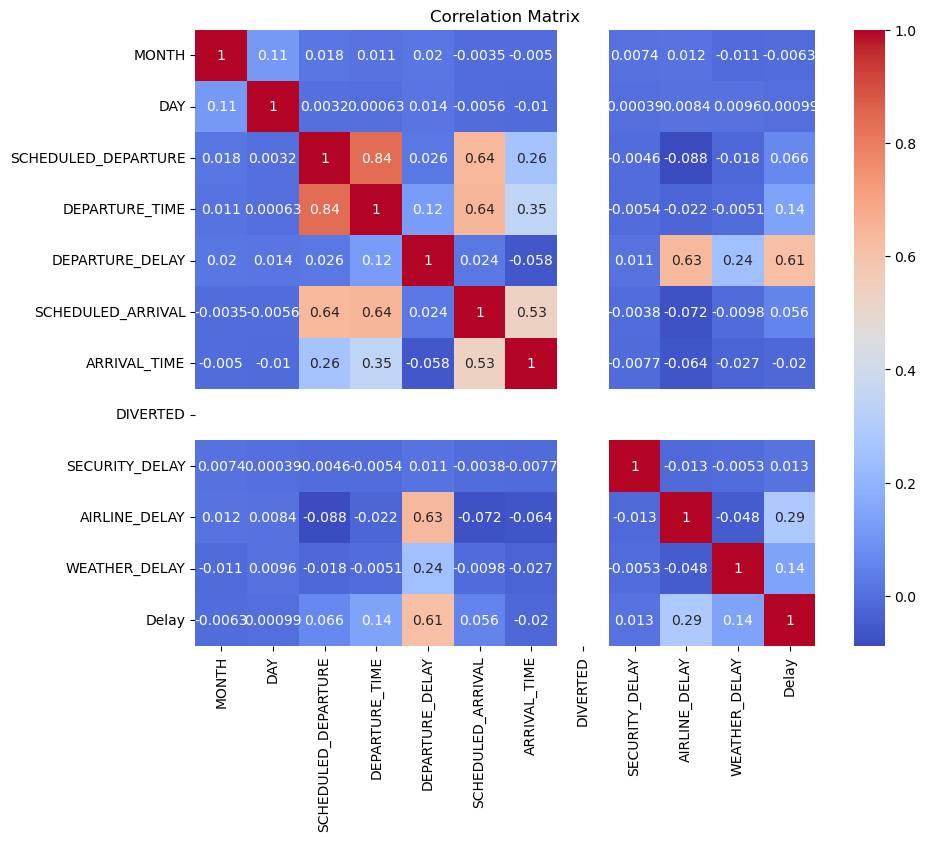

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(flights_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [68]:
flights_data.head(3)

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,SECURITY_DELAY,AIRLINE_DELAY,WEATHER_DELAY,Delay
2291425,5,26,810,1043.0,153.0,950,1222.0,0,0.0,0.0,0.0,3
561402,2,6,2110,2131.0,21.0,2220,2256.0,0,0.0,0.0,1.0,2
31747,1,3,630,703.0,33.0,930,1009.0,0,0.0,33.0,0.0,2


# Model Builing

# Decision Tree

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

In [70]:
data = flights_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [72]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [73]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')
auc_score

0.8427228988960965

In [74]:
dt_pred = clf.predict(X_test)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

In [75]:
dt_precision

0.8145177169291298

In [76]:
dt_recall

0.8136739529555761

In [77]:
dt_f1

0.8140653232234464

<h1>Accuracy is 0.840</h1>

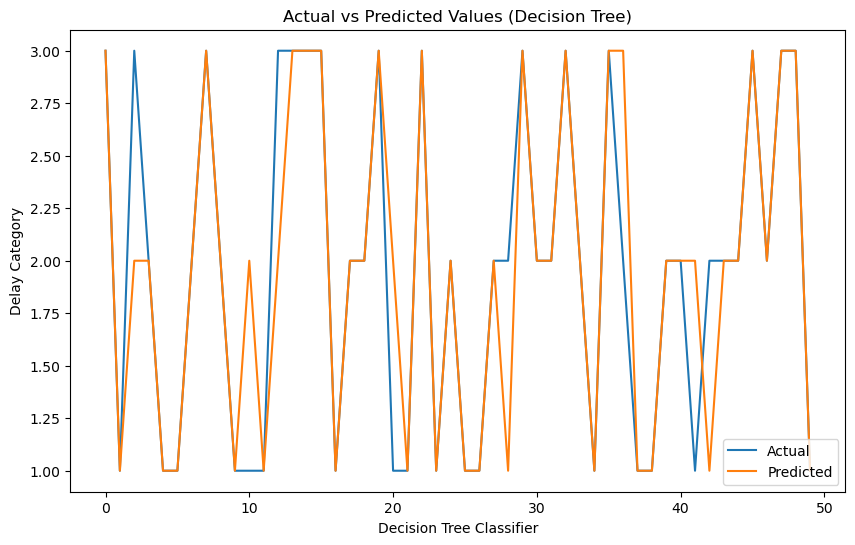

In [78]:
# Make predictions on the test set using the decision tree classifier
y_pred = clf.predict(X_test)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(y_test[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.xlabel('Decision Tree Classifier')
plt.ylabel('Delay Category')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.legend()
plt.show()

# Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
raccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", raccuracy)


Accuracy: 0.8274920560197717


In [80]:
rf_pred = rf_classifier.predict(X_test)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

In [81]:
rf_precision

0.8309425530743046

In [82]:
rf_recall

0.8274920560197717

In [83]:
rf_f1

0.8178256274840446

<h1>Accuracy is 0.827</h1>

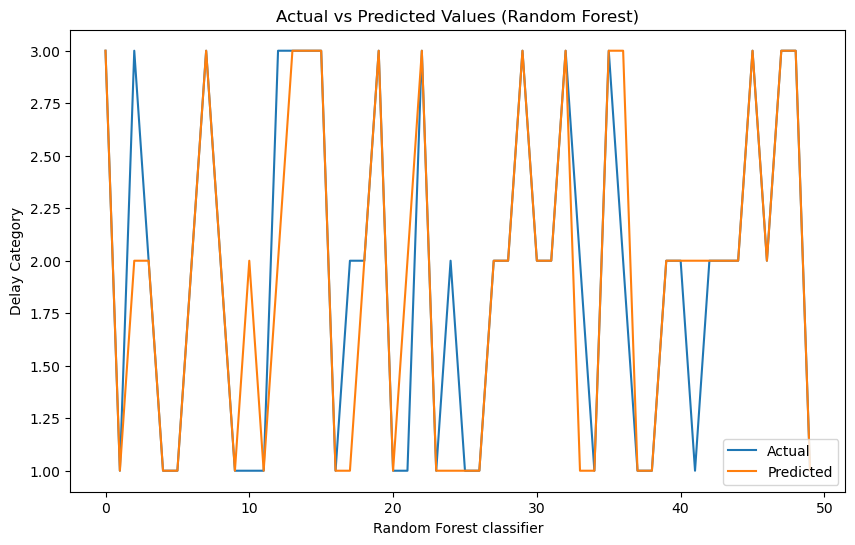

In [87]:
# Make predictions on the test set using the Random Forest classifier
y_pred = rf_classifier.predict(X_test)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(y_test[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.xlabel('Random Forest classifier')
plt.ylabel('Delay Category')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.legend()
plt.show()


# Support Vector Machine

In [117]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate an SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate the accuracy of the classifier
saccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", saccuracy)


Accuracy: 0.792646758830637


In [89]:
svm_pred = svm_classifier.predict(X_test_scaled)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

C:\Users\amanj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
svm_precision


0.7734376601833594

In [91]:
svm_recall

0.792646758830637

In [92]:
svm_f1

0.7778635442219545

# Accuracy is 0.792

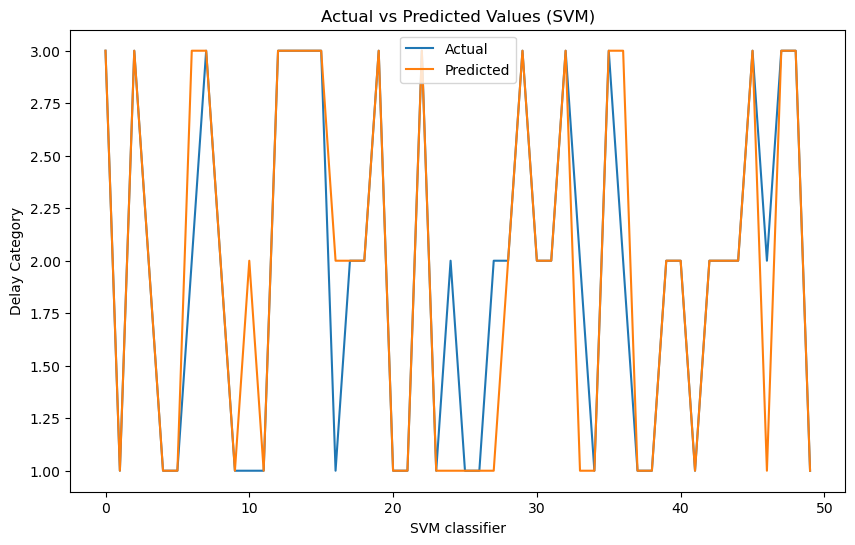

In [93]:
# Make predictions on the test set using the SVM classifier
y_pred = svm_classifier.predict(X_test_scaled)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(y_test[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.xlabel('SVM classifier')
plt.ylabel('Delay Category')
plt.title('Actual vs Predicted Values (SVM)')
plt.legend()
plt.show()


# LogisticRegression

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate a Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Train the classifier
logreg_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test_scaled)

# Calculate the accuracy of the classifier
laccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", laccuracy)


Accuracy: 0.7271486183250427


# Accuracy is 0.727

In [97]:
logreg_pred = logreg_classifier.predict(X_test_scaled)
logreg_precision = precision_score(y_test, logreg_pred, average='weighted')
logreg_recall = recall_score(y_test, logreg_pred, average='weighted')
logreg_f1 = f1_score(y_test, logreg_pred, average='weighted')

C:\Users\amanj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
logreg_precision

0.7055124700778607

In [99]:
logreg_recall

0.7271486183250427

In [100]:
logreg_f1

0.7138393142128547

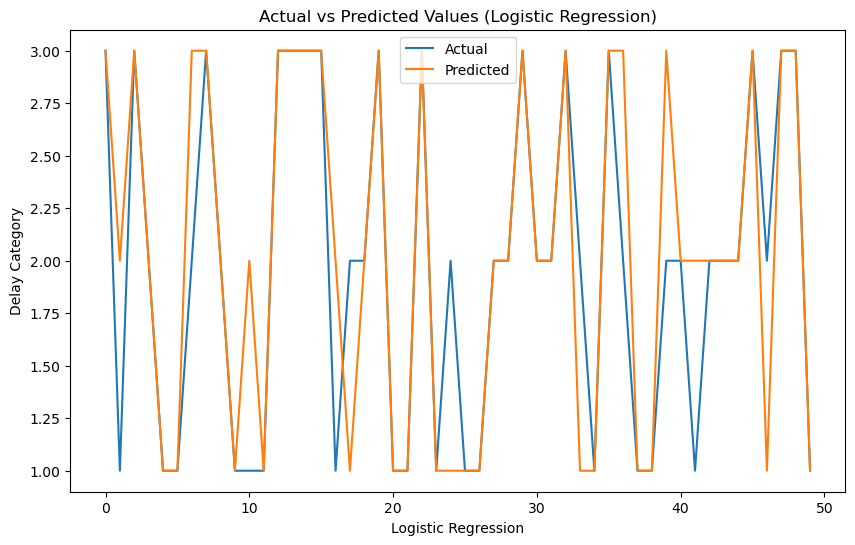

In [101]:
# Make predictions on the test set using the Logistic Regression classifier
y_pred = logreg_classifier.predict(X_test_scaled)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(y_test[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.xlabel('Logistic Regression')
plt.ylabel('Delay Category')
plt.title('Actual vs Predicted Values (Logistic Regression)')
plt.legend()
plt.show()


# Confusion Matrix

In [103]:
from sklearn.metrics import confusion_matrix

# Decision Tree Classifier
y_pred_dt = clf.predict(X_test)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix - Decision Tree Classifier:")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree Classifier:
[[ 1248   958    93     9]
 [  958 19460  2886   173]
 [  116  2821 14191  1691]
 [    9   213  1947 16954]]


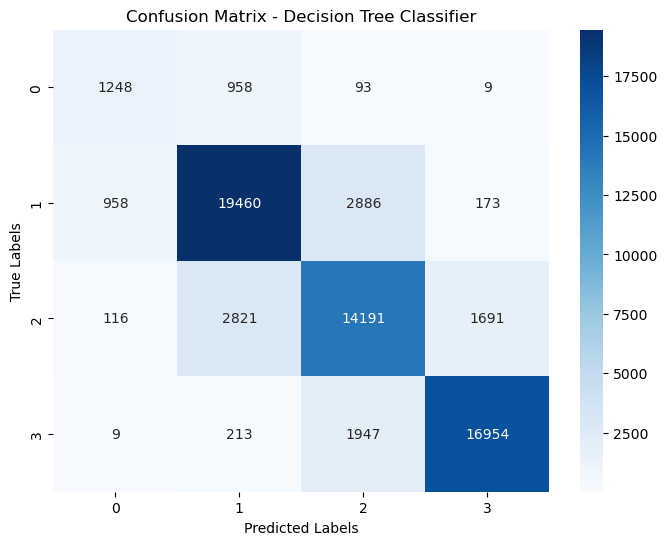

In [104]:
#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [105]:
# Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix - Random Forest Classifier:")
print(confusion_matrix_rf)


Confusion Matrix - Random Forest Classifier:
[[  943  1342    23     0]
 [   51 22355  1065     6]
 [   14  2800 15548   457]
 [    4   158  1409 17552]]


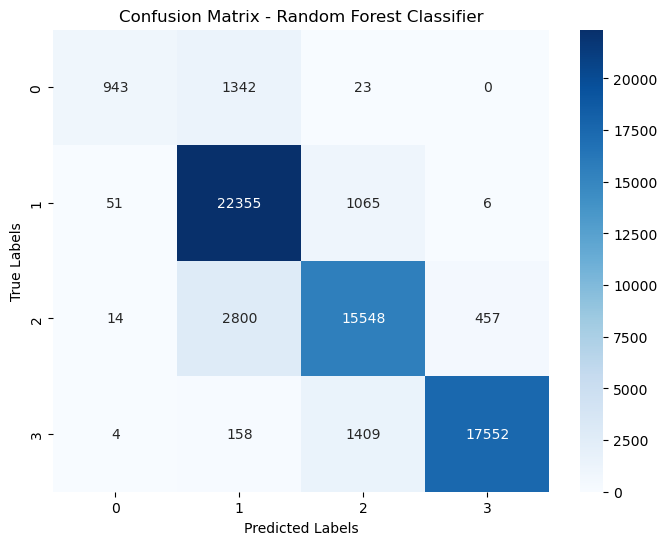

In [106]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [107]:
# SVM Classifier
y_pred_svm = svm_classifier.predict(X_test_scaled)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix - SVM Classifier:")
print(confusion_matrix_svm)


Confusion Matrix - SVM Classifier:
[[    0  2293    15     0]
 [    0 21301  2170     6]
 [    0  5801 12389   629]
 [    0   128  2172 16823]]


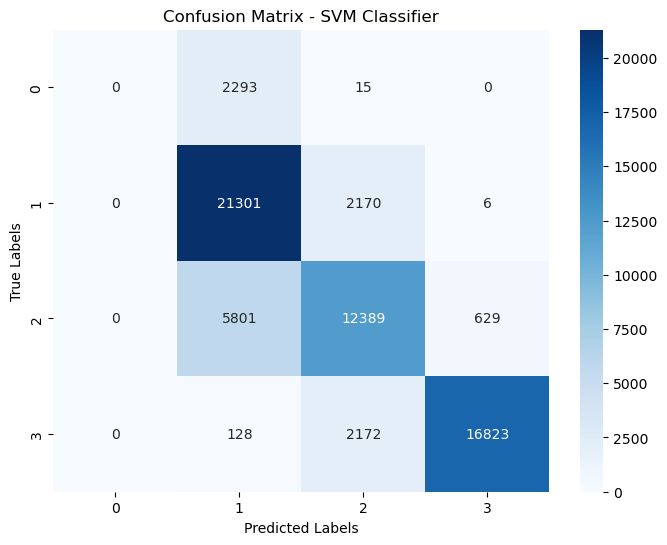

In [108]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [109]:
# Logistic Regression Classifier
y_pred_lr = logreg_classifier.predict(X_test_scaled)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix - Logistic Regression Classifier:")
print(confusion_matrix_lr)


Confusion Matrix - Logistic Regression Classifier:
[[    0  2203   105     0]
 [    0 18962  4485    30]
 [    0  5947 11116  1756]
 [    0   874  1988 16261]]


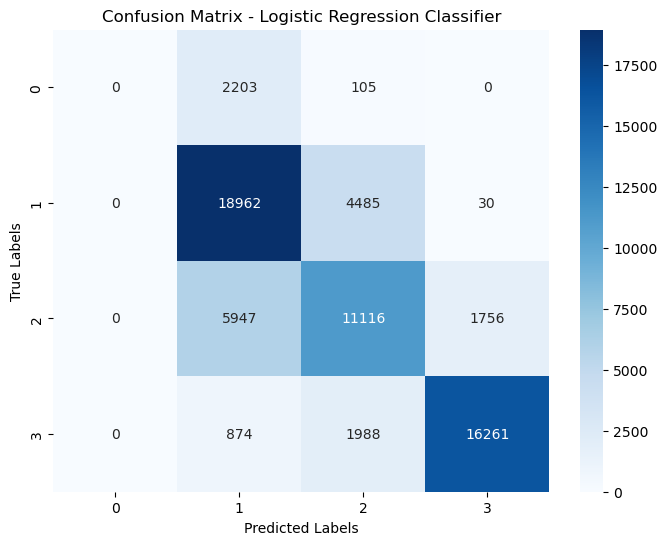

In [110]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_lr, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Logistic Regression Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [111]:
# Predictions
y_pred_dt = clf.predict(X_test)
prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
print(prediction_df)


       Actual  Predicted
0         3.0        3.0
1         1.0        1.0
2         3.0        2.0
3         2.0        2.0
4         1.0        1.0
...       ...        ...
63722     1.0        1.0
63723     3.0        3.0
63724     3.0        3.0
63725     3.0        2.0
63726     3.0        2.0

[63727 rows x 2 columns]


# Comparison Table

In [120]:
algorithm_names = ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression']
precision_scores = [dt_precision, rf_precision, svm_precision, logreg_precision]
recall_scores = [dt_recall, rf_recall, svm_recall, logreg_recall]
f1_scores = [dt_f1, rf_f1, svm_f1, logreg_f1]
accuracy_scores = [auc_score, raccuracy, saccuracy, laccuracy]

In [135]:
data = {
    'Algorithm': algorithm_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'accuracy': accuracy_scores
}
comparison_table = pd.DataFrame(data)
print(comparison_table)

             Algorithm  Precision    Recall  F1 Score  accuracy
0        Decision Tree   0.814518  0.813674  0.814065  0.842723
1        Random Forest   0.830943  0.827492  0.817826  0.827492
2                  SVM   0.773438  0.792647  0.777864  0.792647
3  Logistic Regression   0.705512  0.727149  0.713839  0.727149


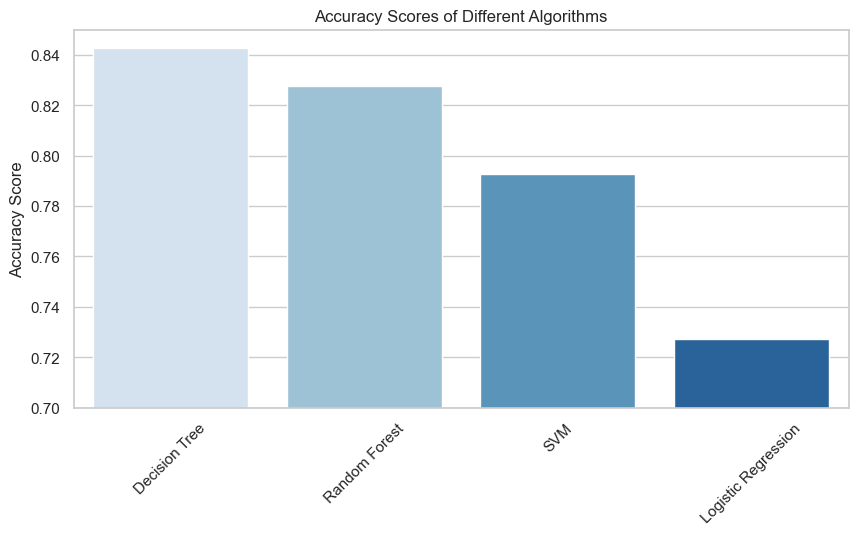

In [134]:
sns.set_style('whitegrid')

#Comparision Graph
plt.figure(figsize=(10, 6))
sns.barplot(x=algorithm_names, y=accuracy_scores, palette='Blues')

plt.ylim(0.70, 0.85)
plt.ylabel('Accuracy Score')

plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.25)
plt.title('Accuracy Scores of Different Algorithms')
plt.show()